In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTEN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow_decision_forests as tfdf
import pandas as pd

In [3]:
data1 = pd.read_csv('/kaggle/input/cirrhosis-patient-survival-prediction/cirrhosis.csv')
data2 = pd.read_csv('/kaggle/input/playground-series-s3e26/train.csv')

In [4]:
cols1 = [x for x in data1.columns]
cols1

['ID',
 'N_Days',
 'Status',
 'Drug',
 'Age',
 'Sex',
 'Ascites',
 'Hepatomegaly',
 'Spiders',
 'Edema',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [5]:
cols2 = [y for y in data2.columns]

In [6]:
un = [x for x in zip(cols1,cols2)]

In [7]:
un

[('ID', 'id'),
 ('N_Days', 'N_Days'),
 ('Status', 'Drug'),
 ('Drug', 'Age'),
 ('Age', 'Sex'),
 ('Sex', 'Ascites'),
 ('Ascites', 'Hepatomegaly'),
 ('Hepatomegaly', 'Spiders'),
 ('Spiders', 'Edema'),
 ('Edema', 'Bilirubin'),
 ('Bilirubin', 'Cholesterol'),
 ('Cholesterol', 'Albumin'),
 ('Albumin', 'Copper'),
 ('Copper', 'Alk_Phos'),
 ('Alk_Phos', 'SGOT'),
 ('SGOT', 'Tryglicerides'),
 ('Tryglicerides', 'Platelets'),
 ('Platelets', 'Prothrombin'),
 ('Prothrombin', 'Stage'),
 ('Stage', 'Status')]

In [8]:
data = pd.concat([data1,data2],axis=0)

In [9]:
data.isnull().sum()

ID               7905
N_Days              0
Status              0
Drug              106
Age                 0
Sex                 0
Ascites           106
Hepatomegaly      106
Spiders           106
Edema               0
Bilirubin           0
Cholesterol       134
Albumin             0
Copper            108
Alk_Phos          106
SGOT              106
Tryglicerides     136
Platelets          11
Prothrombin         2
Stage               6
id                418
dtype: int64

In [10]:
data['id']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
7900    7900.0
7901    7901.0
7902    7902.0
7903    7903.0
7904    7904.0
Name: id, Length: 8323, dtype: float64

In [11]:
cols = [x for x in data1.columns]
for x in cols:
    print(x)

ID
N_Days
Status
Drug
Age
Sex
Ascites
Hepatomegaly
Spiders
Edema
Bilirubin
Cholesterol
Albumin
Copper
Alk_Phos
SGOT
Tryglicerides
Platelets
Prothrombin
Stage


In [12]:
data = data.drop('ID',axis = 1)
data = data.drop('id',axis = 1)
cols.remove('ID')
#cols.remove('id')

In [13]:
objectCols = []
for i in cols: 
    if data[f'{i}'].dtype == object :
        objectCols.append(i)

In [14]:
objectCols.remove('Status')

In [15]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
encoder = OrdinalEncoder()
labelencoder = LabelEncoder()

In [16]:
encodedData = data.copy()
encodedData[objectCols] = encoder.fit_transform(data[objectCols])
encodedData['Status'] = labelencoder.fit_transform(data['Status'])

In [17]:
encodedData['Status'].value_counts()

Status
0    5197
2    2826
1     300
Name: count, dtype: int64

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

In [19]:
imputedData = pd.DataFrame(imputer.fit_transform(encodedData),columns = cols)

In [20]:
imputedData.isnull().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [21]:
smoten = SMOTEN()

In [22]:
X = imputedData[cols]
y = imputedData['Status']

In [23]:
X = X.drop('Status',axis = 1)

In [24]:
X.shape

(8323, 18)

In [25]:
y.value_counts()

Status
0.0    5197
2.0    2826
1.0     300
Name: count, dtype: int64

In [26]:
sData = smoten.fit_resample(X,y)

In [27]:
sData[1].value_counts()

Status
2.0    5197
0.0    5197
1.0    5197
Name: count, dtype: int64

In [28]:
yn = to_categorical(sData[1])

In [29]:
yn = pd.DataFrame(yn,columns = ['Status_C','Status_CL','Status_D'])
xn = sData[0]

In [30]:
xntrain,xntest,yntrain,yntest = train_test_split(yn,xn,test_size = 0.2)

In [31]:
newdatatrain = pd.concat([xntrain,yntrain],axis = 1)
newdatatest = pd.concat([xntest,yntest],axis = 1)

In [32]:
Dtrain = newdatatest.drop(["Status_CL","Status_C"],axis =1)
Ctrain = newdatatest.drop(["Status_D","Status_CL"],axis =1)
CLtrain = newdatatest.drop(["Status_D","Status_C"],axis =1)
Dtest = newdatatest.drop(["Status_CL","Status_C"],axis =1)
Ctest = newdatatest.drop(["Status_D","Status_CL"],axis =1)
CLtest = newdatatest.drop(["Status_D","Status_C"],axis =1)

In [33]:
tf_dataset_D_train = tfdf.keras.pd_dataframe_to_tf_dataset(Dtrain,label = 'Status_D')
tf_dataset_D_train

<_PrefetchDataset element_spec=({'N_Days': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Drug': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Sex': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Ascites': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Hepatomegaly': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Spiders': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Edema': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Bilirubin': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Cholesterol': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Albumin': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Copper': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Alk_Phos': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'SGOT': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Tryglicerides': TensorSpec(shape=(

In [34]:
tf_dataset_D_test = tfdf.keras.pd_dataframe_to_tf_dataset(Dtest,label = 'Status_D')
tf_dataset_D_test

<_PrefetchDataset element_spec=({'N_Days': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Drug': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Sex': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Ascites': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Hepatomegaly': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Spiders': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Edema': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Bilirubin': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Cholesterol': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Albumin': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Copper': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Alk_Phos': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'SGOT': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Tryglicerides': TensorSpec(shape=(

In [35]:
tf_dataset_C_train = tfdf.keras.pd_dataframe_to_tf_dataset(Ctrain,label = 'Status_C')
tf_dataset_C_train

<_PrefetchDataset element_spec=({'N_Days': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Drug': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Sex': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Ascites': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Hepatomegaly': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Spiders': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Edema': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Bilirubin': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Cholesterol': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Albumin': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Copper': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Alk_Phos': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'SGOT': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Tryglicerides': TensorSpec(shape=(

In [36]:
tf_dataset_C_test = tfdf.keras.pd_dataframe_to_tf_dataset(Ctest,label = 'Status_C')
tf_dataset_C_test

<_PrefetchDataset element_spec=({'N_Days': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Drug': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Sex': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Ascites': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Hepatomegaly': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Spiders': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Edema': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Bilirubin': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Cholesterol': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Albumin': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Copper': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Alk_Phos': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'SGOT': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Tryglicerides': TensorSpec(shape=(

In [37]:
tf_dataset_CL_train = tfdf.keras.pd_dataframe_to_tf_dataset(CLtrain,label = 'Status_CL')
tf_dataset_CL_train

<_PrefetchDataset element_spec=({'N_Days': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Drug': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Sex': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Ascites': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Hepatomegaly': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Spiders': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Edema': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Bilirubin': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Cholesterol': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Albumin': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Copper': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Alk_Phos': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'SGOT': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Tryglicerides': TensorSpec(shape=(

In [38]:
tf_dataset_CL_test = tfdf.keras.pd_dataframe_to_tf_dataset(CLtest,label = 'Status_CL')
tf_dataset_CL_test

<_PrefetchDataset element_spec=({'N_Days': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Drug': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Age': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Sex': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Ascites': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Hepatomegaly': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Spiders': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Edema': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Bilirubin': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Cholesterol': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Albumin': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Copper': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Alk_Phos': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'SGOT': TensorSpec(shape=(None,), dtype=tf.float64, name=None), 'Tryglicerides': TensorSpec(shape=(

In [39]:
# Configure the tuner.

# Create a Random Search tuner with 50 trials.
tuner = tfdf.tuner.RandomSearch(num_trials=50)

# Define the search space.
#
# Adding more parameters generaly improve the quality of the model, but make
# the tuning last longer.

tuner.choice("min_examples", [2, 5, 7, 10])
tuner.choice("categorical_algorithm", ["CART", "RANDOM"])

# Some hyper-parameters are only valid for specific values of other
# hyper-parameters. For example, the "max_depth" parameter is mostly useful when
# "growing_strategy=LOCAL" while "max_num_nodes" is better suited when
# "growing_strategy=BEST_FIRST_GLOBAL".

local_search_space = tuner.choice("growing_strategy", ["LOCAL"])
local_search_space.choice("max_depth", [3, 4, 5, 6, 8])

# merge=True indicates that the parameter (here "growing_strategy") is already
# defined, and that new values are added to it.
global_search_space = tuner.choice("growing_strategy", ["BEST_FIRST_GLOBAL"], merge=True)
global_search_space.choice("max_num_nodes", [16, 32, 64, 128, 256])

tuner.choice("use_hessian_gain", [True, False])
tuner.choice("shrinkage", [0.02, 0.05, 0.10, 0.15])
tuner.choice("num_candidate_attributes_ratio", [0.2, 0.5, 0.9, 1.0])

# Uncomment some (or all) of the following hyper-parameters to increase the
# quality of the search. The number of trial should be increased accordingly.

tuner.choice("split_axis", ["AXIS_ALIGNED"])
oblique_space = tuner.choice("split_axis", ["SPARSE_OBLIQUE"], merge=True)
oblique_space.choice("sparse_oblique_normalization",
                      ["NONE", "STANDARD_DEVIATION", "MIN_MAX"])
oblique_space.choice("sparse_oblique_weights", ["BINARY", "CONTINUOUS"])
oblique_space.choice("sparse_oblique_num_projections_exponent", [1.0, 1.5])

In [40]:


# Tune the model. Notice the `tuner=tuner`.
tuned_modelD = tfdf.keras.GradientBoostedTreesModel(tuner=tuner)
tuned_modelD.fit(tf_dataset_D_train, verbose=0)

tuned_modelC = tfdf.keras.GradientBoostedTreesModel(tuner=tuner)
tuned_modelC.fit(tf_dataset_C_train, verbose=0)

tuned_modelCL = tfdf.keras.GradientBoostedTreesModel(tuner=tuner)
tuned_modelCL.fit(tf_dataset_CL_train, verbose=0)

# The `num_threads` model constructor argument (not specified in the example
# above) controls how many trials are run in parallel (one per thread). If
# `num_threads` is not specified (like in the example above), one thread is
# allocated for each available CPU core.
#
# If the training is interrupted (for example, by pressing on the "stop" button
# on the top-left of the colab cell), the best model so-far will be returned.

# In the training logs, you can see lines such as `[10/50] Score: -0.45 / -0.40
# HParams: ...`. This indicates that 10 of the 50 trials have been completed.
# And that the last trial returned a score of "-0.45" and that the best trial so
# far has a score of "-0.40". In this example, the model is optimized by
# logloss. Since scores are maximized and log loss should be minimized, the
# score is effectively minus the log loss.

Use /tmp/tmpfic7tma6 as temporary training directory


[WARNING 23-12-16 19:33:57.7227 UTC gradient_boosted_trees.cc:1818] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-12-16 19:33:57.7228 UTC gradient_boosted_trees.cc:1829] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-12-16 19:33:57.7228 UTC gradient_boosted_trees.cc:1843] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
[INFO 23-12-16 19:36:22.8486 UTC kernel.cc:1243] Loading model from path /tmp/tmpfic7tma6/model/ with prefix 8e88b67f988f421e
[INFO 23-12-16 19:36:22.9207 UTC decision_forest.cc:660] Model loaded with 155 root(s), 19507 node(s), and 18 input feature(s).
[INFO 23-12-16 19:36:22.9209 UTC abstract_model.cc:1311] Engine "GradientBoostedTreesOptPred" built
[INFO 23-12-16 19:36:22.9210 UTC kernel.cc:1075] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Use /tmp/tmpt19rngg9 as temporary training directory


[WARNING 23-12-16 19:36:25.1628 UTC gradient_boosted_trees.cc:1818] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-12-16 19:36:25.1629 UTC gradient_boosted_trees.cc:1829] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-12-16 19:36:25.1629 UTC gradient_boosted_trees.cc:1843] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
[INFO 23-12-16 19:38:28.4387 UTC kernel.cc:1243] Loading model from path /tmp/tmpt19rngg9/model/ with prefix 5c68299e88a84483
[INFO 23-12-16 19:38:28.4546 UTC decision_forest.cc:660] Model loaded with 50 root(s), 3500 node(s), and 18 input feature(s).
[INFO 23-12-16 19:38:28.4546 UTC abstract_model.cc:1311] Engine "GradientBoostedTreesGeneric" built
[INFO 23-12-16 19:38:28.4546 UTC kernel.cc:1075] Use fast generic engine


Use /tmp/tmpw4rixu1j as temporary training directory


[WARNING 23-12-16 19:38:29.0000 UTC gradient_boosted_trees.cc:1818] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-12-16 19:38:29.0000 UTC gradient_boosted_trees.cc:1829] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-12-16 19:38:29.0000 UTC gradient_boosted_trees.cc:1843] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".
[INFO 23-12-16 19:40:55.8191 UTC kernel.cc:1243] Loading model from path /tmp/tmpw4rixu1j/model/ with prefix 9a67e2c82d204116
[INFO 23-12-16 19:40:55.8358 UTC decision_forest.cc:660] Model loaded with 262 root(s), 3814 node(s), and 18 input feature(s).
[INFO 23-12-16 19:40:55.8360 UTC abstract_model.cc:1311] Engine "GradientBoostedTreesGeneric" built
[INFO 23-12-16 19:40:55.8361 UTC kernel.cc:1075] Use fast generic engine


In [41]:
# Evaluate the model
tuned_modelD.compile(["accuracy"])
tuned_test_accuracyD = tuned_modelD.evaluate(tf_dataset_D_test, return_dict=True, verbose=0)["accuracy"]
print(f"Test accuracy with the TF-DF hyper-parameter tuner: {tuned_test_accuracyD:.4f}")

Test accuracy with the TF-DF hyper-parameter tuner: 0.9885


In [42]:
# Display the tuning logs.
tuning_logsD = tuned_modelD.make_inspector().tuning_logs()
tuning_logsD.head()

,score,evaluation_time,best,min_examples,categorical_algorithm,growing_strategy,max_num_nodes,use_hessian_gain,shrinkage,num_candidate_attributes_ratio,split_axis,sparse_oblique_normalization,sparse_oblique_weights,sparse_oblique_num_projections_exponent,max_depth
0,-0.555680,6.618319,False,2,RANDOM,BEST_FIRST_GLOBAL,16.0,false,0.05,0.9,SPARSE_OBLIQUE,NONE,BINARY,1.0,NaN
1,-0.575366,7.773613,False,10,CART,BEST_FIRST_GLOBAL,32.0,true,0.02,0.9,SPARSE_OBLIQUE,STANDARD_DEVIATION,CONTINUOUS,1.0,NaN
2,-0.564478,8.790456,False,5,CART,LOCAL,NaN,false,0.15,0.9,AXIS_ALIGNED,NaN,NaN,NaN,6.0
3,-0.544807,10.288021,False,7,RANDOM,LOCAL,NaN,false,0.15,1.0,AXIS_ALIGNED,NaN,NaN,NaN,6.0
4,-0.577805,10.704660,False,2,RANDOM,BEST_FIRST_GLOBAL,32.0,true,0.10,0.2,SPARSE_OBLIQUE,MIN_MAX,CONTINUOUS,1.5,NaN


In [43]:
# Best hyper-parameters.
tuning_logsD[tuning_logsD.best].iloc[0]

score                                          -0.51068
evaluation_time                                25.44505
best                                               True
min_examples                                          5
categorical_algorithm                            RANDOM
growing_strategy                                  LOCAL
max_num_nodes                                       NaN
use_hessian_gain                                  false
shrinkage                                          0.05
num_candidate_attributes_ratio                      1.0
split_axis                                 AXIS_ALIGNED
sparse_oblique_normalization                        NaN
sparse_oblique_weights                              NaN
sparse_oblique_num_projections_exponent             NaN
max_depth                                           8.0
Name: 9, dtype: object

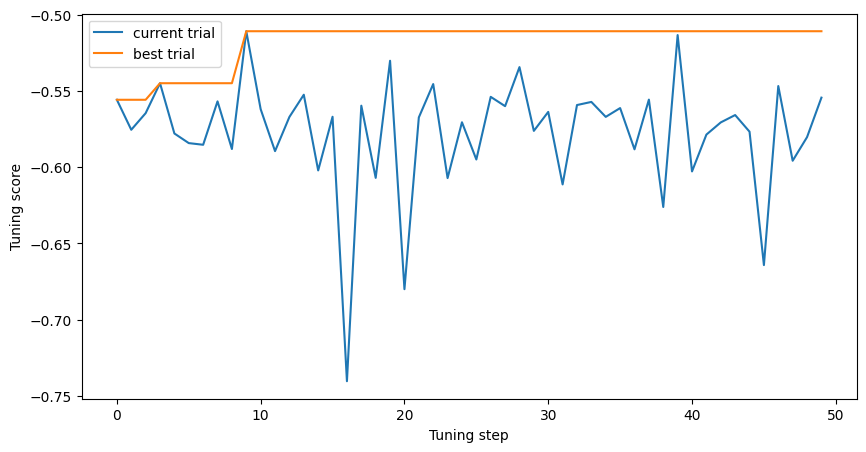

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(tuning_logsD["score"], label="current trial")
plt.plot(tuning_logsD["score"].cummax(), label="best trial")
plt.xlabel("Tuning step")
plt.ylabel("Tuning score")
plt.legend()
plt.show()

In [45]:
# Evaluate the model
tuned_modelC.compile(["accuracy"])
tuned_test_accuracyC = tuned_modelC.evaluate(tf_dataset_C_test, return_dict=True, verbose=0)["accuracy"]
print(f"Test accuracy with the TF-DF hyper-parameter tuner: {tuned_test_accuracyC:.4f}")

Test accuracy with the TF-DF hyper-parameter tuner: 0.9869


In [46]:
# Display the tuning logs.
tuning_logsC = tuned_modelC.make_inspector().tuning_logs()
tuning_logsC.head()

,score,evaluation_time,best,min_examples,categorical_algorithm,growing_strategy,max_num_nodes,use_hessian_gain,shrinkage,num_candidate_attributes_ratio,split_axis,sparse_oblique_normalization,sparse_oblique_weights,sparse_oblique_num_projections_exponent,max_depth
0,-0.473225,4.949475,False,2,RANDOM,BEST_FIRST_GLOBAL,16.0,false,0.05,0.9,SPARSE_OBLIQUE,NONE,BINARY,1.0,NaN
1,-0.509020,6.667835,False,5,CART,LOCAL,NaN,false,0.15,0.9,AXIS_ALIGNED,NaN,NaN,NaN,6.0
2,-0.487943,7.635563,False,10,CART,BEST_FIRST_GLOBAL,32.0,true,0.02,0.9,SPARSE_OBLIQUE,STANDARD_DEVIATION,CONTINUOUS,1.0,NaN
3,-0.491233,8.135695,False,7,RANDOM,LOCAL,NaN,false,0.15,1.0,AXIS_ALIGNED,NaN,NaN,NaN,6.0
4,-0.523044,8.779572,False,2,RANDOM,BEST_FIRST_GLOBAL,32.0,true,0.10,0.2,SPARSE_OBLIQUE,MIN_MAX,CONTINUOUS,1.5,NaN


In [47]:
# Best hyper-parameters.
tuning_logsC[tuning_logsC.best].iloc[0]

score                                              -0.443733
evaluation_time                                   115.386056
best                                                    True
min_examples                                              10
categorical_algorithm                                   CART
growing_strategy                           BEST_FIRST_GLOBAL
max_num_nodes                                          128.0
use_hessian_gain                                       false
shrinkage                                               0.15
num_candidate_attributes_ratio                           0.2
split_axis                                    SPARSE_OBLIQUE
sparse_oblique_normalization                            NONE
sparse_oblique_weights                            CONTINUOUS
sparse_oblique_num_projections_exponent                  1.5
max_depth                                                NaN
Name: 45, dtype: object

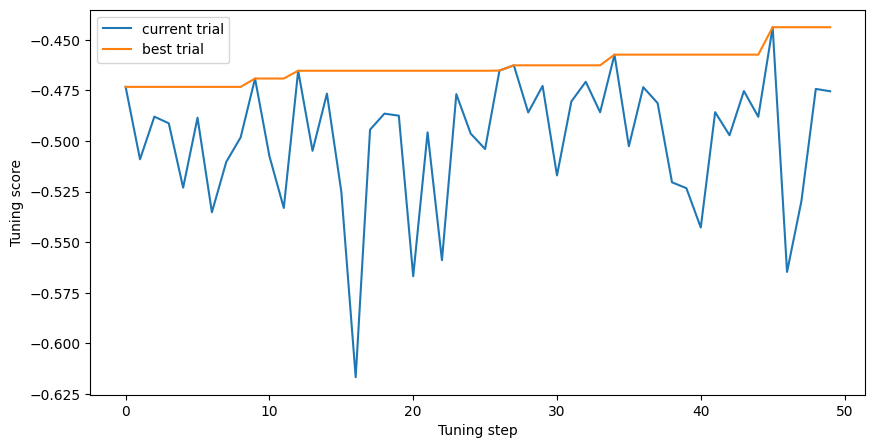

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(tuning_logsC["score"], label="current trial")
plt.plot(tuning_logsC["score"].cummax(), label="best trial")
plt.xlabel("Tuning step")
plt.ylabel("Tuning score")
plt.legend()
plt.show()

In [49]:
# Evaluate the model
tuned_modelCL.compile(["accuracy"])
tuned_test_accuracyCL = tuned_modelCL.evaluate(tf_dataset_CL_test, return_dict=True, verbose=0)["accuracy"]
print(f"Test accuracy with the TF-DF hyper-parameter tuner: {tuned_test_accuracyCL:.4f}")

Test accuracy with the TF-DF hyper-parameter tuner: 0.9958


In [50]:
# Display the tuning logs.
tuning_logsCL = tuned_modelCL.make_inspector().tuning_logs()
tuning_logsCL.head()

,score,evaluation_time,best,min_examples,categorical_algorithm,growing_strategy,max_num_nodes,use_hessian_gain,shrinkage,num_candidate_attributes_ratio,split_axis,sparse_oblique_normalization,sparse_oblique_weights,sparse_oblique_num_projections_exponent,max_depth
0,-0.255751,6.742553,False,2,RANDOM,BEST_FIRST_GLOBAL,16.0,false,0.05,0.9,SPARSE_OBLIQUE,NONE,BINARY,1.0,NaN
1,-0.262522,7.834949,False,10,CART,BEST_FIRST_GLOBAL,32.0,true,0.02,0.9,SPARSE_OBLIQUE,STANDARD_DEVIATION,CONTINUOUS,1.0,NaN
2,-0.242242,9.291998,False,5,CART,LOCAL,NaN,false,0.15,0.9,AXIS_ALIGNED,NaN,NaN,NaN,6.0
3,-0.262389,10.065475,False,7,RANDOM,LOCAL,NaN,false,0.15,1.0,AXIS_ALIGNED,NaN,NaN,NaN,6.0
4,-0.264974,15.284382,False,2,RANDOM,BEST_FIRST_GLOBAL,32.0,true,0.10,0.2,SPARSE_OBLIQUE,MIN_MAX,CONTINUOUS,1.5,NaN


In [51]:
# Best hyper-parameters.
tuning_logsCL[tuning_logsCL.best].iloc[0]

score                                               -0.229194
evaluation_time                                     36.213206
best                                                     True
min_examples                                                5
categorical_algorithm                                  RANDOM
growing_strategy                                        LOCAL
max_num_nodes                                             NaN
use_hessian_gain                                         true
shrinkage                                                 0.1
num_candidate_attributes_ratio                            0.5
split_axis                                     SPARSE_OBLIQUE
sparse_oblique_normalization               STANDARD_DEVIATION
sparse_oblique_weights                             CONTINUOUS
sparse_oblique_num_projections_exponent                   1.5
max_depth                                                 4.0
Name: 13, dtype: object

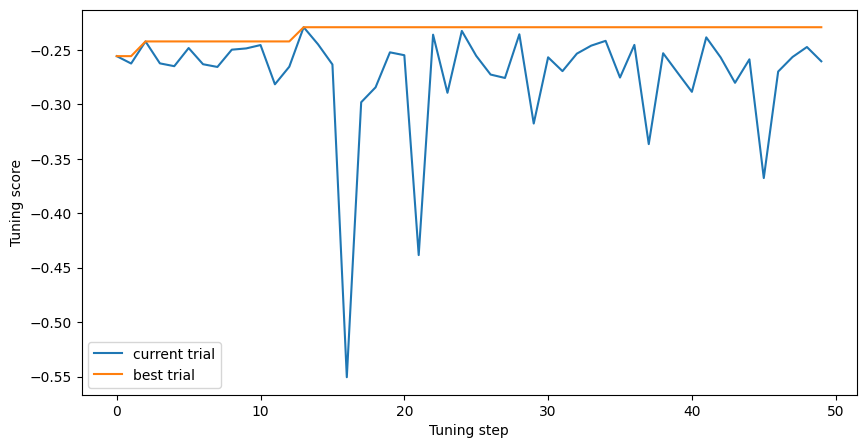

In [52]:
plt.figure(figsize=(10, 5))
plt.plot(tuning_logsCL["score"], label="current trial")
plt.plot(tuning_logsCL["score"].cummax(), label="best trial")
plt.xlabel("Tuning step")
plt.ylabel("Tuning score")
plt.legend()
plt.show()

In [53]:
test_data = pd.read_csv('/kaggle/input/playground-series-s3e26/test.csv')
test_data[objectCols] = encoder.transform(test_data[objectCols])
ID = test_data['id']
test_data.drop('id',axis = 1)

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,3839,0.0,19724,0.0,0.0,1.0,0.0,0.0,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,2468,0.0,14975,0.0,0.0,0.0,0.0,0.0,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,51,1.0,13149,0.0,0.0,1.0,0.0,2.0,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,2330,0.0,20510,0.0,0.0,0.0,0.0,0.0,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,1615,0.0,21904,0.0,0.0,1.0,0.0,0.0,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,2870,1.0,12279,0.0,0.0,0.0,0.0,0.0,1.3,302.0,3.43,75.0,1345.0,145.00,44.0,181.0,10.6,3.0
5267,1770,1.0,24803,0.0,0.0,0.0,0.0,0.0,0.5,219.0,4.09,121.0,663.0,79.05,94.0,311.0,9.7,3.0
5268,3707,0.0,16990,0.0,0.0,1.0,0.0,0.0,0.8,315.0,4.09,13.0,1637.0,170.50,70.0,426.0,10.9,3.0
5269,1216,1.0,11773,0.0,0.0,0.0,0.0,0.0,0.7,329.0,3.80,52.0,678.0,57.00,126.0,306.0,10.2,1.0


In [54]:
tf_test_data = tfdf.keras.pd_dataframe_to_tf_dataset(test_data)

In [55]:
predD = tuned_modelD.predict(tf_test_data)

6/6 [==============================] - 0s 12ms/step


In [56]:
predC = tuned_modelC.predict(tf_test_data)

6/6 [==============================] - 0s 13ms/step


In [57]:
predCL = tuned_modelCL.predict(tf_test_data)

6/6 [==============================] - 0s 19ms/step


In [58]:
submission = pd.DataFrame({'id':ID})

In [59]:
submission['Status_D'] = predD

In [60]:
submission['Status_C'] = predC

In [61]:
submission['Status_CL'] = predCL

In [62]:
submission.to_csv("submission.csv",index = False)